In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import re
from nltk.corpus import stopwords
import altair as alt

In [2]:
#pip install "vegafusion[embed]>=1.4.0"

In [3]:
df = pd.read_csv('board_games.csv')

In [4]:
df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [5]:
df.shape

(10532, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

## After having a look up into my data, I will proceed to prepare my dataset in order to have a better experience working on it.

### The first thing that I noticed is that I have a lot of NaN values. Another interesting thing about the NaN values is that the columns that contains them are "object" type, so in this case, I will replace them to "Not available".


In [7]:
df = df.fillna('Not available')

In [8]:
df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",Not available,Karl-Heinz Schmiel,Not available,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",Not available,"G. W. ""Jerry"" D'Arcey",Not available,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",Not available,Reiner Knizia,Not available,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,Not available,Ancient,Not available,Christian Beierer,Not available,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,Not available,Sid Sackson,Not available,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10532 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10532 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          10532 non-null  object 
 13  category        10532 non-null  object 
 14  compilation     10532 non-null  object 
 15  designer        10532 non-null  object 
 16  expansion       10532 non-null  object 
 17  family          10532 non-null 

## After deleting my NaN values with the fillna() function, I used the info() to make sure there are no more NaN's.

## I see some columns that are useless for me, for example 'compilation', 'expansion', 'description', 'thumbnail' and 'image'. I will drop those columns. I find this columns useless because they don't give me any relevant information.

In [10]:
df.drop(columns = ['compilation', 'expansion', 'description', 'image', 'thumbnail'], inplace = True)

In [11]:
df.head()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,year_published,artist,category,designer,family,mechanic,publisher,average_rating,users_rated
0,1,5,240,14,3,240,Die Macher,240,1986,Marcus Gschwendtner,"Economic,Negotiation,Political",Karl-Heinz Schmiel,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,4,30,12,3,30,Dragonmaster,30,1981,Bob Pepper,"Card Game,Fantasy","G. W. ""Jerry"" D'Arcey",Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,4,60,10,2,30,Samurai,60,1998,Franz Vohwinkel,"Abstract Strategy,Medieval",Reiner Knizia,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,4,60,12,2,60,Tal der Könige,60,1992,Not available,Ancient,Christian Beierer,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,6,90,12,3,90,Acquire,90,1964,"Scott Okumura,Peter Whitley",Economic,Sid Sackson,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


## Now that I have clean my dataset, I will start with the questions.

# PART 1

# 1.- What are the top 5 “average rated” games? 
## To answer this question, I will proceed to sort my data by the column 'average_rating' then I will display the top 5 results.

In [12]:
average_rated = df.sort_values(by = ['average_rating'], ascending = False)

In [13]:
average_rated.head()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,year_published,artist,category,designer,family,mechanic,publisher,average_rating,users_rated
8348,140135,6,80,8,2,40,Small World Designer Edition,80,2015,"Miguel Coimbra,Cyrille Daujean","Civilization,Fantasy,Territory Building",Philippe Keyaerts,"Crowdfunding: Kickstarter,Small World","Area Control / Area Influence,Area Movement,Di...",Days of Wonder,9.00392,180
6392,55690,6,180,17,1,60,Kingdom Death: Monster,180,2015,"Lokman Lam,Lorinda Tomko","Adventure,Fantasy,Horror,Mature / Adult,Miniat...",Adam Poots,"Campaign Games,Crowdfunding: Kickstarter,Kingd...","Co-operative Play,Dice Rolling,Grid Movement,R...",Kingdom Death,8.93184,1954
9964,181289,5,150,12,2,60,Terra Mystica: Big Box,150,2015,Dennis Lohausen,"Civilization,Economic,Fantasy,Territory Building","Jens Drögemüller,Helge Ostertag",Terra Mystica,"Route/Network Building,Variable Player Powers","Feuerland Spiele,Korea Boardgames co., Ltd.",8.84862,109
8526,144574,2,60,15,2,60,Last Chance for Victory,60,2014,"Dean Essig,Gettysburg Cyclorama","American Civil War,Civil War,Wargame",Dean Essig,Line of Battle Series,"Dice Rolling,Hex-and-Counter",Multi-Man Publishing,8.84603,88
9675,173504,8,6000,12,2,60,"The Greatest Day: Sword, Juno, and Gold Beaches",6000,2015,Nicolás Eskubi,"Wargame,World War II",Adam Starkweather,Grand Tactical Series,Chit-Pull System,Multi-Man Publishing,8.83081,86


In [14]:
top5_rated_games = average_rated.head(5)

In [15]:
top5_rated_games

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,year_published,artist,category,designer,family,mechanic,publisher,average_rating,users_rated
8348,140135,6,80,8,2,40,Small World Designer Edition,80,2015,"Miguel Coimbra,Cyrille Daujean","Civilization,Fantasy,Territory Building",Philippe Keyaerts,"Crowdfunding: Kickstarter,Small World","Area Control / Area Influence,Area Movement,Di...",Days of Wonder,9.00392,180
6392,55690,6,180,17,1,60,Kingdom Death: Monster,180,2015,"Lokman Lam,Lorinda Tomko","Adventure,Fantasy,Horror,Mature / Adult,Miniat...",Adam Poots,"Campaign Games,Crowdfunding: Kickstarter,Kingd...","Co-operative Play,Dice Rolling,Grid Movement,R...",Kingdom Death,8.93184,1954
9964,181289,5,150,12,2,60,Terra Mystica: Big Box,150,2015,Dennis Lohausen,"Civilization,Economic,Fantasy,Territory Building","Jens Drögemüller,Helge Ostertag",Terra Mystica,"Route/Network Building,Variable Player Powers","Feuerland Spiele,Korea Boardgames co., Ltd.",8.84862,109
8526,144574,2,60,15,2,60,Last Chance for Victory,60,2014,"Dean Essig,Gettysburg Cyclorama","American Civil War,Civil War,Wargame",Dean Essig,Line of Battle Series,"Dice Rolling,Hex-and-Counter",Multi-Man Publishing,8.84603,88
9675,173504,8,6000,12,2,60,"The Greatest Day: Sword, Juno, and Gold Beaches",6000,2015,Nicolás Eskubi,"Wargame,World War II",Adam Starkweather,Grand Tactical Series,Chit-Pull System,Multi-Man Publishing,8.83081,86


In [16]:
print(top5_rated_games['name'])

8348                       Small World Designer Edition
6392                             Kingdom Death: Monster
9964                             Terra Mystica: Big Box
8526                            Last Chance for Victory
9675    The Greatest Day: Sword, Juno, and Gold Beaches
Name: name, dtype: object


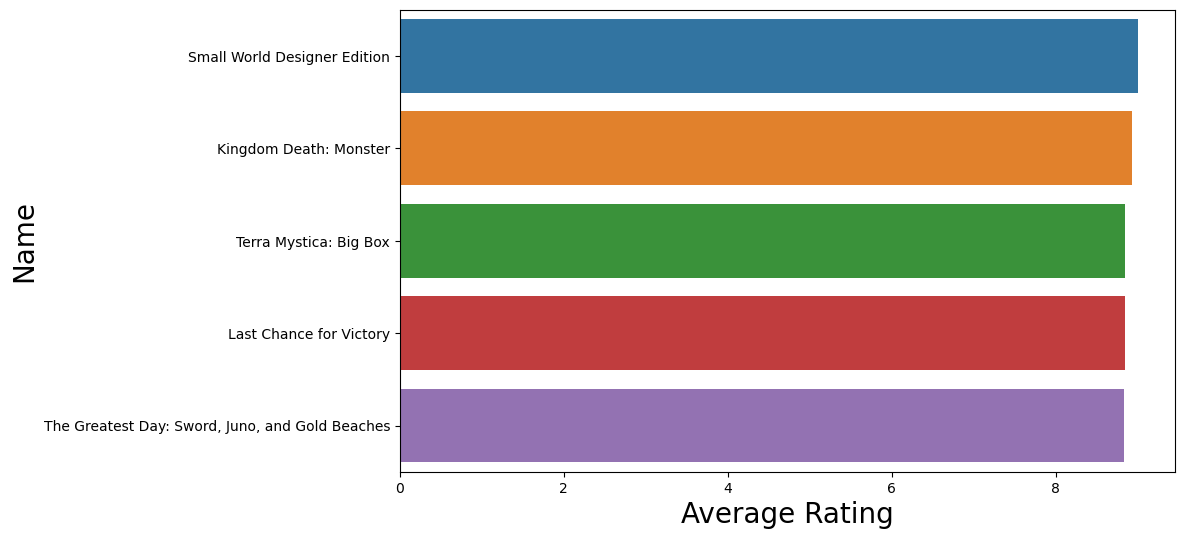

In [17]:
plt.figure(figsize=(10, 6))
sns.color_palette('deep')
sns.barplot(x = 'average_rating', y = 'name', data = top5_rated_games)
plt.xlabel('Average Rating', fontsize = 20)
plt.ylabel('Name', fontsize = 20);

## The top 5 average rated games are:
### Small World Designer Edition
### Kingdom Death: Monster
### Terra Mystica: Big Box
### Last Chance for Victory
### The Greatest Day: Sword, Juno, and Gold Beaches

# 2.- Is there a correlation between the “users_rated” and the “max_playtime”?

## To answer this question, I will use the .corr() function from pandas. Corr. method is used to find the pairwise correlation of all columns in the dataset. Then I will continue to plot it. I will use a scatterplot for this because  they represent the archetypical visualization when we want to show one quantitative variable relative to another.

In [18]:
correlation = df['users_rated'].corr(df['max_playtime'])

In [19]:
print('The correlation coefficient between the variables is: ', correlation)

The correlation coefficient between the variables is:  -0.004341647333776701


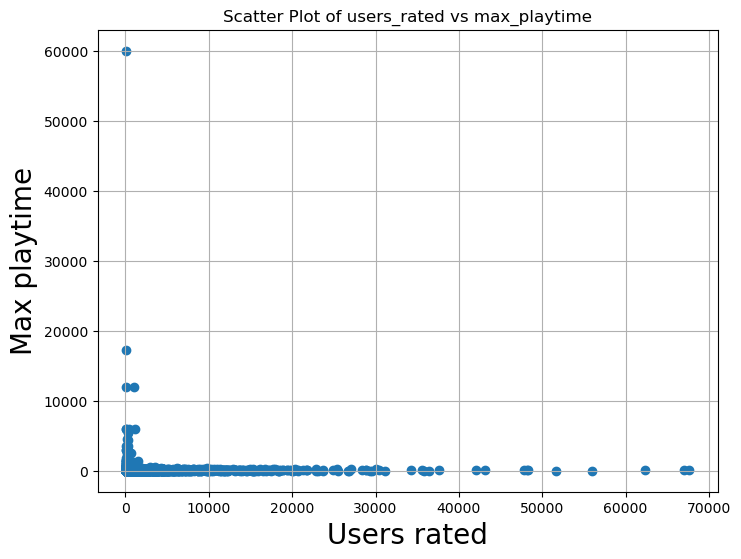

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(df['users_rated'], df['max_playtime'])
plt.xlabel('Users rated', fontsize = 20)
plt.ylabel('Max playtime', fontsize = 20)
plt.title('Scatter Plot of users_rated vs max_playtime')
plt.grid(True)
plt.show()

## The correlation coefficient is -.004. This tells us that there is a brief negative correlation between these two variables.


## The scatterplot dont tell us much about the correlation relationship. We can see some outliers. I will delete them and plot again to be able to see better the values of the variables. 

In [21]:
df_no_outliers = df.query('users_rated < 30000 and max_playtime < 7000')

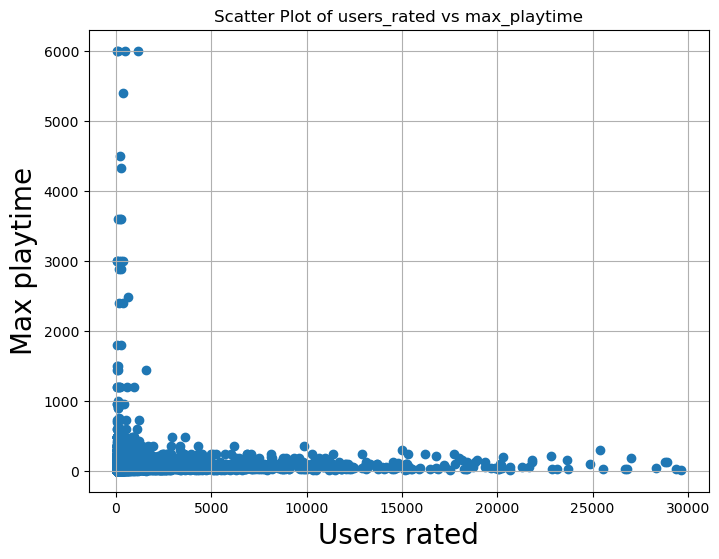

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['users_rated'], df_no_outliers['max_playtime'])
plt.xlabel('Users rated', fontsize = 20)
plt.ylabel('Max playtime', fontsize = 20)
plt.title('Scatter Plot of users_rated vs max_playtime')
plt.grid(True)
plt.show()

## After deleting the outliers with the query function, we can see that most games only have between 0-20k users that rates them and the playtime is less than 1k. If a game have a lot of playtime, it doesn't mean that the users will rate them.

# 3.- What is the distribution of game categories? (You may not use a barchart)

In [23]:
df_category = df

## We can see that our column 'category' have 3861, does this means that there are 3861 types of categories?

In [24]:
df_category['category'].nunique()

3861

In [25]:
df_category['category'].head()

0    Economic,Negotiation,Political
1                 Card Game,Fantasy
2        Abstract Strategy,Medieval
3                           Ancient
4                          Economic
Name: category, dtype: object

## I can see that the values in the column 'category' are messed up. We have different categories for one game. My plan for this question is to split the words by a ',', this will separate the words for me and finally I can count the words to know how many times they appear in the column.

## Wit the function split() im separating the values by ','. Next im using the function explode(), this function works to unpack all of my category values into a different row.

In [26]:
df_category['category'] = df_category['category'].str.split(',').explode('category')

## After doing our splitting, I will print the data to see how it looks.
## We will notice that now we have only one category per line. This is thanks to the explode() function.

In [27]:
df_category['category'].head()

0       Economic
1    Negotiation
2      Political
3      Card Game
4        Fantasy
Name: category, dtype: object

## Now its time to count all of the values. Using value_counts() function will make the work for us. This function counts every repeated values and shows me how many are in the dataset.

In [28]:
categories = df_category['category'].value_counts().to_frame('count').rename_axis('Category').reset_index()
categories.head()

,Category,count
0,Wargame,1254
1,Card Game,901
2,World War II,401
3,Fantasy,369
4,Science Fiction,341


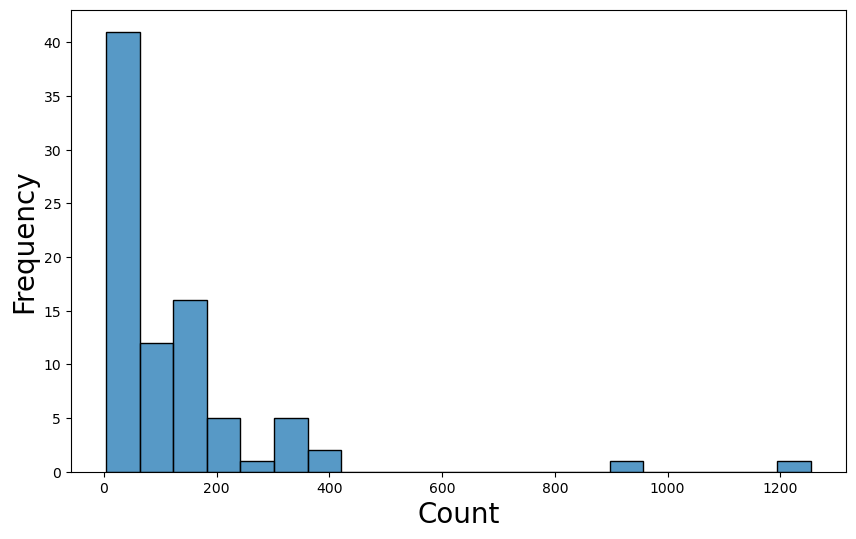

In [29]:
#categories['count'].plot(kind='hist')
plt.figure(figsize=(10, 6))
plt.xlabel('Count', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
sns.color_palette('deep')
sns.histplot(data = categories['count']);

### In this distribution, we can see the frequency of repetitions between the categories. 0-50 Categories have a frequency of 40-45. We see some outliers. With this visualization we can appreciate that few categories repeats between 400-1500 times. Most of them are distribuited between the 0-200 times.

# Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)? 

## For this question, I will create a new column in my dataset called 'Years'. If the game is older It will have a value of == 0 and if the game is newer it will have a value of == 1. The reason im doing this is because I want a variable that specifies this information, in this way I will be able to make a good boxplot to show the answer to the question.

In [30]:
df_years = df

In [31]:
df_years['Years'] = [0 if x <= 1992 else 1 for x in df_years['year_published']]

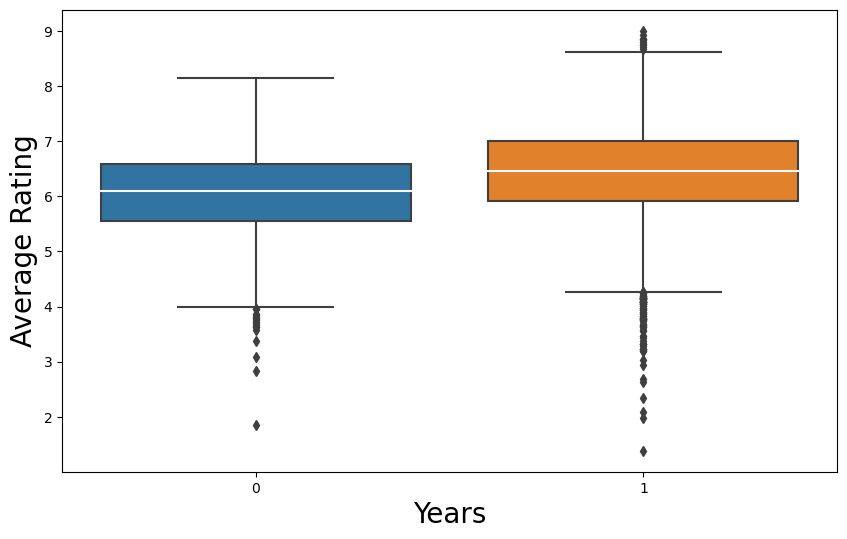

In [32]:
plt.figure(figsize=(10, 6))
sns.color_palette('deep')
sns.boxplot(y = 'average_rating', x = 'Years', data=df, medianprops={'color': 'white'})
plt.xlabel('Years', fontsize = 20)
plt.ylabel('Average Rating', fontsize = 20);

## Here we can see the distributions of the older and newer games. We see that the older games have some outliers but most of their rating are between 5.6 and 6.5 and that the median is 6.1. On the other hand, we see that the newer games also have some outliers and the most of their ratings are between 6 and 6.8 and that the median is 6.4, The median is represented by the white line.

## To make sure that our information is true, I will make the calculations with the median() function.

In [33]:
df_years.groupby('Years').median('average_rating')

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
Years,,,,,,,,,,
0,3473.5,4.0,60.0,11.0,2.0,60.0,60.0,1983.0,6.088120,129.0
1,42899.5,4.0,45.0,10.0,2.0,40.0,45.0,2009.0,6.462915,189.0


## We can confirm that the median of 'average_rating' for the older games is 6.088 and for the newer games is 6.462. So the answer is NO, older games doesn't have a higher median in 'average_rating' than the newer games.

# What are the 5 most common “mechanics” in the dataset? 

## This is similar to the question #3 about the categories. I will use the same steps to split my values by ',', then use the function explode so I can unpack all of the values. To finish the process, I will plot the result and show in a barplot which are the 5 most common mechanics.

In [34]:
df['mechanic'].nunique()

3210

In [35]:
df_category['mechanic'] = df_category['mechanic'].str.split(',').explode('mechanic')

In [36]:
mechanics = df_category['mechanic'].value_counts().to_frame('count').rename_axis('Mechanic').reset_index()
top5_mechanics = mechanics.head()
top5_mechanics.head()

,Mechanic,count
0,Dice Rolling,1068
1,Hex-and-Counter,1016
2,Hand Management,647
3,Not available,631
4,Set Collection,505


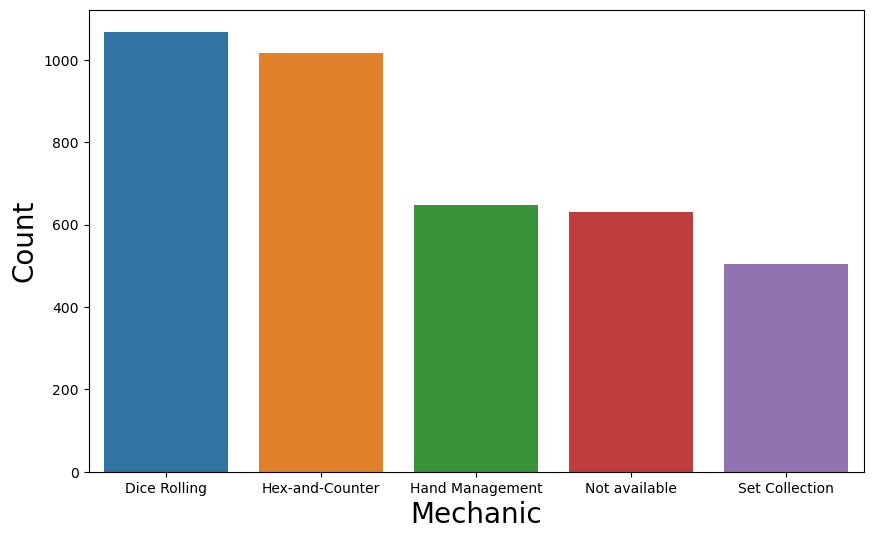

In [37]:
plt.figure(figsize=(10, 6))
sns.color_palette('deep')
sns.barplot(x = 'Mechanic', y = 'count', data = top5_mechanics);
plt.xlabel('Mechanic', fontsize = 20)
plt.ylabel('Count', fontsize = 20);

# PART 2

# You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. 

# This must have a logical basis that enhances the information and insight gained in the scenario.

## Scenario:
## You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.

## Since the scenario is telling me to analyze their sales by the upcoming winter season, what I think is that since the weather is colder in most part of the world during this season, one of the main activities of people can be to gather with their friends in a house and play games.

## What does this tell me? Maybe in winter season the games that are multiplayer have more max_time played.

## This leaves me with the following questions. 
## Multiplayer games have more impact than singleplayer games?
## Which audience should they focus during this season?

In [38]:
df_players = df

## I will use the function nunique() to see how many values of min_players are in our dataset

In [39]:
df_players['min_players'].nunique()

10

## Time to groupby our datasets to see how many values we have from each unique value

In [40]:
df_players.groupby('min_players').count()

,game_id,max_players,max_playtime,min_age,min_playtime,name,playing_time,year_published,artist,category,designer,family,mechanic,publisher,average_rating,users_rated,Years
min_players,,,,,,,,,,,,,,,,,
0,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
1,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280
2,7531,7531,7531,7531,7531,7531,7531,7531,7531,7531,7531,7531,7531,7531,7531,7531,7531
3,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405
4,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230
5,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
6,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
7,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
8,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


## We can see that there are more values from the multiplayer games. To make a deep comparison, I will only take the values where min_players == 1 and min_players == 2.

In [41]:
df_multiplayer = df_players.query('min_players == 2')
df_singleplayer = df_players.query('min_players == 1')

In [42]:
alt.data_transformers.enable("vegafusion")
chart_singleplayer = alt.Chart(df_singleplayer).mark_circle().encode(y = 'max_playtime',
                                       color = 'min_players:N')

In [43]:
chart1_singleplayer = chart_singleplayer.encode(x = 'average_rating')
chart2_singleplayer = chart_singleplayer.encode(x = 'min_age')
#chart3_singleplayer = chart_singleplayer.encode(x = 'min_age')
alt.hconcat(chart1_singleplayer, chart2_singleplayer)

alt.HConcatChart(...)

### The first thing that I see with this relation is that the average rating of the singleplayer games are between 4 and 8. This tells us that even though we have not so many singleplayer games, most of them are well received by the players. We see some outliers in the max playtime but most of them are between 0 and 500. This tells us that the players dont hang into them a lot, maybe they just past the story of the game and they stop using them. The other plot shows me that the people between 10 and 15 use more this kind of games.

In [44]:
alt.data_transformers.enable("vegafusion")
chart_multiplayer = alt.Chart(df_multiplayer).mark_circle().encode(y = 'max_playtime',
                                       color = 'min_players:N')

In [45]:
chart1_multiplayer = chart_multiplayer.encode(x = 'average_rating')
chart2_multiplayer = chart_multiplayer.encode(x = 'min_age')
#chart3_multiplayer = chart_multiplayer.encode(x = 'min_age')
alt.hconcat(chart1_multiplayer, chart2_multiplayer)

alt.HConcatChart(...)

### In first sight we see that the max playtime increases with the multiplayer games. We have outliers but most of their max playtime is between 0 and 2000. The ratings are not so good, its true that they have 8 and 9s, but they also have 2 and 4s. The singleplayer games didnt have low rating, but I think that the max playtime have more benefit than the ratings. The audience for the multiplayer games is between 10 and 16 years old. We see a high peak with the 12 years old. This tells me that people between that age likes to sit with their friends for some hours during the game and enjoy the gametime.

### This plots help me to answer our questions.

### Multiplayer games have more impact than singleplayer games?
### Yes they do. Multiplayer games have more max playtime and the difference is huge. This means that players enjoy playing around with friends or online. Even though some of the ratings are not that good as singleplayer games, I think that the max playtime is more important than the rating. Specially in winter season, when the weather is cold and people decide to stay home doing something.

## Which audience should they focus during this season?
### They should focus on the young and teen players. We see some outliers for 20+ years old in the multiplayer games, but having a lot of kids of 12 years old playing 6,000 hours means a lot.

# PART 3

# You must explain, in detail: 

## Why you chose a specific method to engineer the data and how you achieved this in python? (Part 1/Part 2) 

### I choose two libraries: Seaborn and altair.
### The reason I used Seaborn is because I feel confident using it and Im able to create different plots in a easy way. Using seaborn also allows me to choose the correct color palette to show my data. It also have many functions which will allow me to manipulate my data visualization

## Why you chose your specific visualizations to illustrate each answer?(Part 1/Part 2) 

### In part 1 question 1 I choose the barplot because this plot is the best to show amounts. The bar charts makes very effective of this by enconding the quantitive values from a common baseline. Additionally, changing the position of the bars by sorting them from left to right or from top to bottom, caters to the way most people read a chart.

### In part 1 question 2 I choose the scatterplot because it was asking me to compare two variables relationships. Scatterplots represent the archetypical visualization when we want to show one quantitative variable relative to another.

### In part 1 question 3 I choose the histogram because it provides the most intuitive visualization of distributions. My plot shows the frequency of the count of category that repeats in our dataset. Histograms are good for showing general distributional features of dataset variables. You can see roughly where the peaks of the distribution are, whether the distribution is skewed or symmetric, and if there are any outliers.

### In part 1 question 4 I choose the boxplot because I can represent a good distribution between the years and also add the median in it. It was easier just to make bar plots between the years showing the median, but In my opinion if we show all the distributions, we are able to see where is the concentration of values between the years and some outliers. Knowing the concentration of values gives us an idea of which will have the greater median, and to finish, I draw a line where in the median value just to make it clear which is the value we are looking for.

### In part 1 question 5 I choose the barplot again because we were comparing amounts. In my opinion there is no other better way to analize and make a good visualization than the barplot if we want to show amount of quantitavie data.



### In part 2 I decided to use some scatterplots because I was comparing a x-y relation between some variables. In this part I decided to change from seaborn to altair. The reason is funny and simple. It's because we saw this library in class and I think the function hconcant and vconcant would work for me to add two visualizations in one row with hconcat. This helped me to compare two variables without making a mess of my jupyter notebook.

## What design decisions you made for each visualization? (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2) 

### For the color, I decided to use the 'deep' color palette. I decided to use this color palette because It includes mostly all the primary and secondary colors of the color wheel that Isaac Newton developed in 1666. The dominant characteristic of the Deep palette is not warmth or coolness, but depth of colour - tending towards the dark and saturated, and the more neutral end of the spectrum rather than overly warm or cool.

### For the font, I consider that the default font for seaborn “sans-serif” it's good and enough. It shows clarity and formality to the plots. If it works I rather not change it.

### The text position of the labels I put them in the center of the table. I think If it's in the center, makes the visualization clear and It optimizes what the plot means. I had an issue with the part 1 on question 1, due to the names of the games are a little bit large, my first option was to turn the names by 70 degrees but the result was not good. I decided to put the names on the Y label and put the visualization to the right just to make sure the complete names appears, this decision didnt affect the visualization so it was a wise decision.

### The font size I decided to put it on fontsize = 20. I tried between 10-40. 40 and 30 was way too big and made the design look bad. 20 was the perfect for me. It's not enourmos but still have the range for people with visual problems to be able to see. It's important that the important details like the 'X' and 'Y' labels make a difference between the others, just to make sure that the customer or the people who will see notice that the biggest it is, the most important it is. 

## What your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario? (Part 2) 

### I decided to make a comparative between different variables. I choose the scatterplot to see the relations between x-y. For this part, altair hconcant() function helped me a lot. It's a library that help me compare two or more variables with one in a simple way and help me to have an ordenated code and visualizations.

### The answer to my question helps the scenario because they will have a game and an audience to focus on winter season. This will help the company to arrange better the singleplayer and multiplayer games in this season. Also, it helps to choose the games they will be selling. The age audience helps in this, they will choose games that people between 8-17 years rate more and have more users rated.

# References

Yi, M. (2021). A Complete Guide to Histograms. [online] Chartio. Available at: https://chartio.com/learn/charts/histogram-complete-guide/

Educative. (n.d.). Educative Answers - Trusted Answers to Developer Questions. [online] Available at: https://www.educative.io/answers/how-to-change-label-font-sizes-in-seaborn

seaborn.pydata.org. (n.d.). seaborn.histplot — seaborn 0.11.2 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.histplot.html.

Vijetha (2022). Plot Distribution of Column Values in Pandas. [online] Spark By {Examples}. Available at: https://sparkbyexamples.com/pandas/plot-distribution-of-column-values-in-pandas/

GeeksforGeeks. (2019). Creating a dataframe from Pandas series. [online] Available at: https://www.geeksforgeeks.org/creating-a-dataframe-from-pandas-series/.

Pydata.org. (2013). Choosing color palettes — seaborn 0.9.0 documentation. [online] Available at: https://seaborn.pydata.org/tutorial/color_palettes.html.

pandas.pydata.org. (n.d.). pandas.DataFrame.groupby — pandas 1.3.0 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html.

Yıldırım, S. (2021). 10 Examples That Will Make You Use Pandas Query Function More Often. [online] Medium. Available at: https://towardsdatascience.com/10-examples-that-will-make-you-use-pandas-query-function-more-often-a8fb3e9361cb

www.learndatasci.com. (n.d.). Pandas df.explode(): Unnesting Series and DataFrame Columns – LearnDataSci. [online] Available at: https://www.learndatasci.com/solutions/python-pandas-dfexplode

Zach (2021). How to Change Axis Labels on a Seaborn Plot (With Examples). [online] Statology. Available at: https://www.statology.org/seaborn-axis-labels/.